### 🌟 Key Takeaways

1. **Dynamic Range Differences**  
   - The **LG image** preserves detail in bright areas (like solar flares or sunspots), avoiding saturation.  
   - The **HG image** enhances fainter structures—great for picking up subtle features in dimmer regions.

2. **Instrument Behavior**  
   Comparing the two helps you understand how the instrument responds to different signal intensities. It’s often part of calibration or scientific analysis to merge or select the best dataset depending on your study goal.

3. **Noise Characteristics**  
   You might notice **higher noise** levels in HG data when brightness is low, whereas LG tends to be **cleaner but less sensitive**.

4. **Complementary Analysis**  
   If you're studying a wide brightness range (say, from quiet sun regions to active flares), analyzing both datasets allows for a **more complete scientific picture**.

In [1]:
import pandas as pd
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import seaborn as sns

fits_HG = fits.open('vsl_data/VS1_T25_0914_002321_20250616_092605_HG_lev1_V2_1.fits')
fits_LG = fits.open('vsl_data/VS1_T25_0914_002321_20250616_092605_LG_lev1_V2_1.fits')

In [7]:
fits_LG.info()

Filename: vsl_data/VS1_T25_0914_002321_20250616_092605_LG_lev1_V2_1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   (2160, 1280)   int16 (rescales to uint16)   


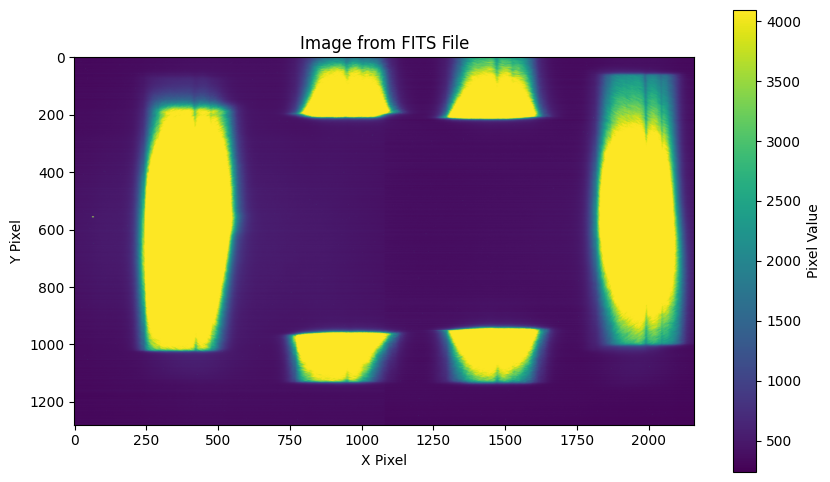

In [11]:
plt.figure(figsize=(10, 6))
plt.imshow(fits_HG[0].data)
plt.colorbar(label='Pixel Value')
plt.title('Image from FITS File')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                   16 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 2160                                                  NAXIS2  =                 1280                                                  OBSERVAT= 'Aditya-L1'          / Name of the Observatory                        INSTRUME= 'VELC    '           / Visible Emission Line Coronagraph              CHANNEL = 'Spectroscopy- 1'                                                     DETECTOR= 'VS1     '                                                            WAVELENG= '530.3 nm'                                                            FOV     = '1.05Ro to 1.5Ro'    / Field of view                                  PIXELSIZ= '6.5 microns/pixel'                                                   PLATESCL= '1.25 arcsec/pixel'           

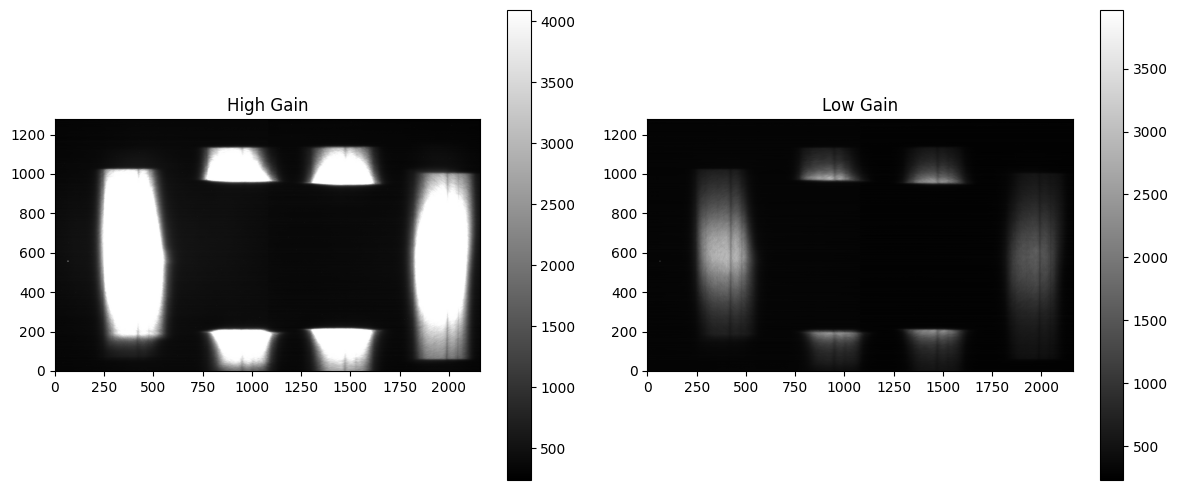

In [12]:
# Check metadata
print(fits_HG[0].header)
print(fits_LG[0].header)

# Visualize the data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(fits_HG[0].data, cmap='gray', origin='lower')
plt.title('High Gain')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(fits_LG[0].data, cmap='gray', origin='lower')
plt.title('Low Gain')
plt.colorbar()

plt.tight_layout()
plt.show()

High Gain Header:
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                   16 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 2160                                                  NAXIS2  =                 1280                                                  OBSERVAT= 'Aditya-L1'          / Name of the Observatory                        INSTRUME= 'VELC    '           / Visible Emission Line Coronagraph              CHANNEL = 'Spectroscopy- 1'                                                     DETECTOR= 'VS1     '                                                            WAVELENG= '530.3 nm'                                                            FOV     = '1.05Ro to 1.5Ro'    / Field of view                                  PIXELSIZ= '6.5 microns/pixel'                                                   PLATESCL= '1.25 arcsec

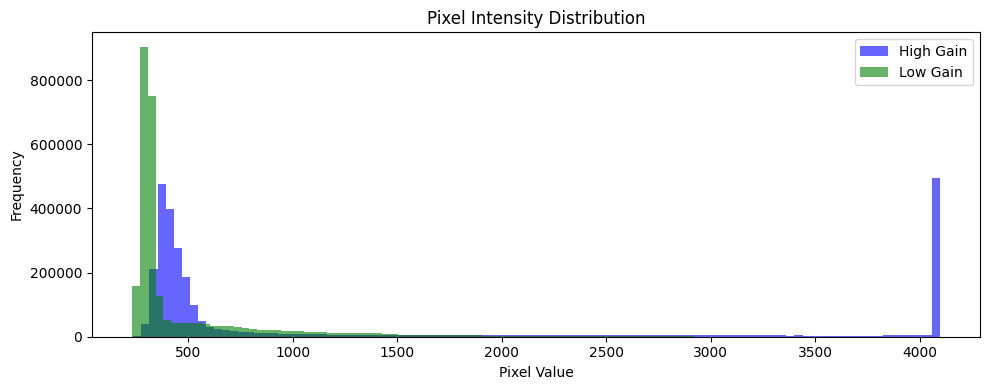

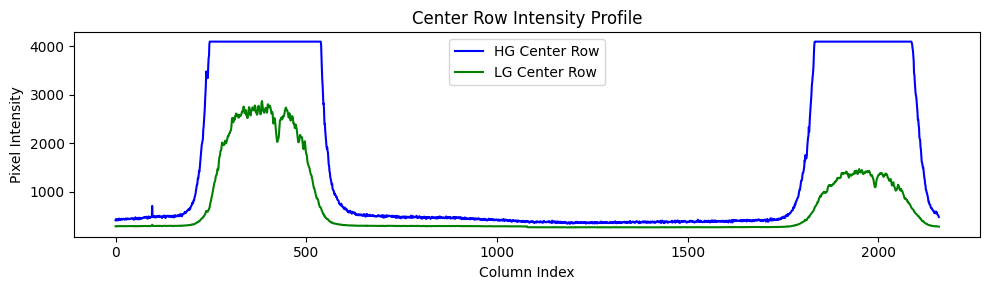

In [13]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

# Load FITS files
fits_HG = fits.open('vsl_data/VS1_T25_0914_002321_20250616_092605_HG_lev1_V2_1.fits')
fits_LG = fits.open('vsl_data/VS1_T25_0914_002321_20250616_092605_LG_lev1_V2_1.fits')

# Extract image data
data_HG = fits_HG[0].data
data_LG = fits_LG[0].data

# Print header summary
print("High Gain Header:")
print(fits_HG[0].header)
print("\nLow Gain Header:")
print(fits_LG[0].header)

# Summary stats
print(f"\nHG mean: {np.mean(data_HG):.2f}, std: {np.std(data_HG):.2f}")
print(f"LG mean: {np.mean(data_LG):.2f}, std: {np.std(data_LG):.2f}")

# Histogram comparison
plt.figure(figsize=(10, 4))
plt.hist(data_HG.flatten(), bins=100, alpha=0.6, label='High Gain', color='blue')
plt.hist(data_LG.flatten(), bins=100, alpha=0.6, label='Low Gain', color='green')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Central row profile comparison
center_row = data_HG.shape[0] // 2
plt.figure(figsize=(10, 3))
plt.plot(data_HG[center_row], label='HG Center Row', color='blue')
plt.plot(data_LG[center_row], label='LG Center Row', color='green')
plt.title('Center Row Intensity Profile')
plt.xlabel('Column Index')
plt.ylabel('Pixel Intensity')
plt.legend()
plt.tight_layout()
plt.show()

# Cleanup
fits_HG.close()
fits_LG.close()

In [14]:
data_HG.flatten()

array([307, 322, 322, ..., 305, 288, 287], shape=(2764800,), dtype=uint16)

In [9]:
fits_LG[0].data

array([[314, 314, 315, ..., 274, 275, 274],
       [323, 322, 323, ..., 297, 296, 297],
       [307, 307, 308, ..., 293, 294, 296],
       ...,
       [301, 300, 302, ..., 269, 267, 268],
       [315, 315, 316, ..., 285, 283, 283],
       [332, 331, 331, ..., 314, 313, 312]],
      shape=(1280, 2160), dtype=uint16)

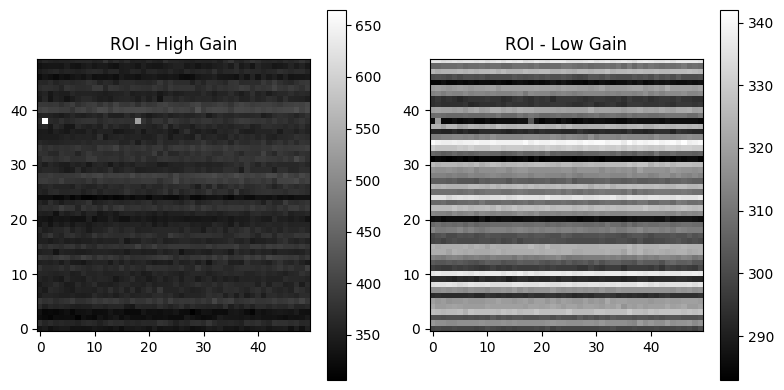

ROI HG mean: 363.2756
ROI LG mean: 311.9024


In [15]:
# Define ROI (row_start, row_end, col_start, col_end)
roi = (100, 150, 100, 150)

roi_HG = data_HG[roi[0]:roi[1], roi[2]:roi[3]]
roi_LG = data_LG[roi[0]:roi[1], roi[2]:roi[3]]

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(roi_HG, cmap='gray', origin='lower')
plt.title('ROI - High Gain')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(roi_LG, cmap='gray', origin='lower')
plt.title('ROI - Low Gain')
plt.colorbar()

plt.tight_layout()
plt.show()

print("ROI HG mean:", np.mean(roi_HG))
print("ROI LG mean:", np.mean(roi_LG))

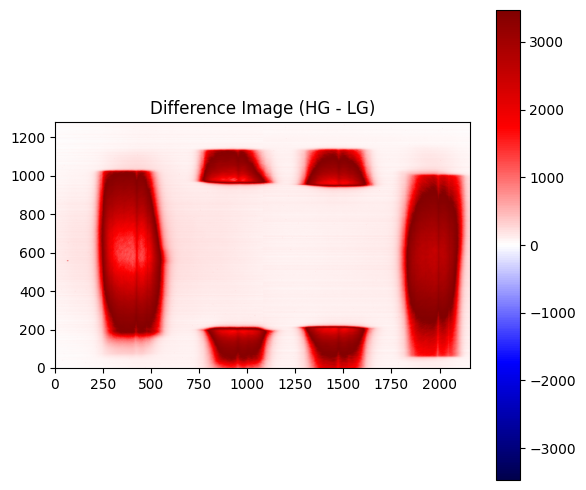

In [16]:
# Compute pixel-wise difference
diff = data_HG.astype(float) - data_LG.astype(float)

plt.figure(figsize=(6, 5))
plt.imshow(diff, cmap='seismic', origin='lower', vmin=-np.max(abs(diff)), vmax=np.max(abs(diff)))
plt.title('Difference Image (HG - LG)')
plt.colorbar()
plt.tight_layout()
plt.show()

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]


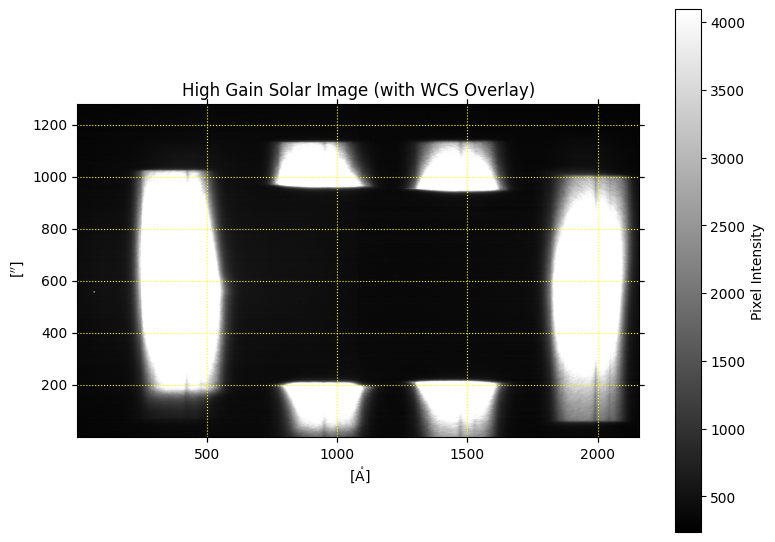

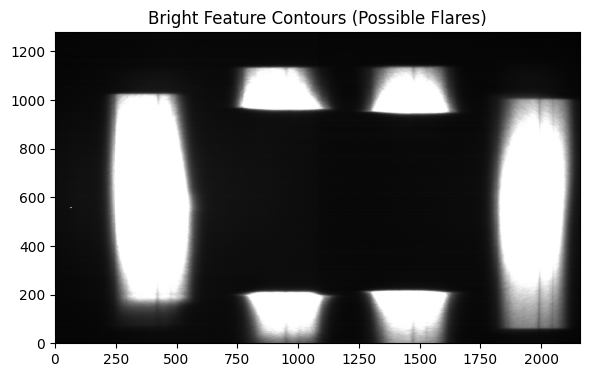

In [21]:
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import numpy as np

# --- Load and sanitize FITS header ---
fits_HG = fits.open('vsl_data/VS1_T25_0914_002321_20250616_092605_HG_lev1_V2_1.fits')
header = fits_HG[0].header.copy()
data_HG = fits_HG[0].data

# Patch invalid units in CUNIT headers
if 'CUNIT1' in header and 'milli' in header['CUNIT1']:
    header['CUNIT1'] = 'Angstrom'
if 'CUNIT2' in header and 'milli' in header['CUNIT2']:
    header['CUNIT2'] = 'Angstrom'

# --- Create WCS object ---
w = WCS(header)

# --- Plot image with WCS overlay ---
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=w)
im = ax.imshow(data_HG, cmap='gray', origin='lower')
ax.coords.grid(True, color='yellow', ls='dotted')
ax.set_title('High Gain Solar Image (with WCS Overlay)')
plt.colorbar(im, ax=ax, orientation='vertical', label='Pixel Intensity')
plt.tight_layout()
plt.show()

# --- Highlight bright regions (simple flare mask example) ---
threshold = np.mean(data_HG) + 3 * np.std(data_HG)
flare_mask = data_HG > threshold

plt.figure(figsize=(6, 5))
plt.imshow(data_HG, cmap='gray', origin='lower')
plt.contour(flare_mask, colors='red', linewidths=0.6)
plt.title('Bright Feature Contours (Possible Flares)')
plt.tight_layout()
plt.show()

# Clean up
fits_HG.close()